In [16]:
import pandas as pd
import xlrd
df = pandas.read_excel('sample_1000.xlsx')

In [17]:
df['text']

0       The Healthiest Pastas: From Quinoa to Buckwhea...
1       Published By: Anchorage Daily News - Today \nP...
2       Published By: ABC News - Today \nVideo obtaine...
3       Note: This post contains spoilers about Fear t...
4       Facebook app draining your iPhone battery? Com...
5       Maroochydore MP Fiona Simpson is calling on th...
6       Published By: Cincinnati Enquirer - Today \nCi...
7       Katy Perry Shows Her Support for Hillary Clint...
8       A Lebanese-born Sydney father has spent 10 mon...
9       Published By: Finger Lake Times - Today \nSENE...
10      ( Source : HACU - Hispanic Association of Coll...
11      ( Source : City of Carrollton, TX ) Enjoy a ni...
12      Published By: Louisville Courier-Journal: Ente...
13      ( Source : NPS - National Park Service ) Dig t...
14      Published By: Charlotte Observer: Living - Tod...
15      Published By: Hood County news - Today \nHeavy...
16      Published By: NYTimes Tennis - Today \nRomania...
17      OPINIO

# Sentiment Analysis using TextBlob


In [24]:
from textblob import TextBlob

# Fill na with empty string
df['text'] = df['text'].fillna('')
# Replace `removed` and `deleted` with empty string
tbr = ['[removed]', '[deleted]']
df['text'] = df['text'].apply(lambda x: '' if x in tbr else x)

In [25]:
#Convert all the text to lowercase - avoids having multiple copies of the same words.
#Replace url in the text with empty space.
#Replace all empty spaces with just one.
#Remove all the empty text from the dataframe

import re
# Convert all the string to lower cases
df['text'] = df['text'].str.lower()
# \S+ means anything that is not an empty space
df['text'] = df['text'].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
df['text'] = df['text'].apply(lambda x: re.sub('\s+', ' ', x))
# We don't want empty string in our text
df = df.loc[df['text'] != ""]

In [26]:
#removing punctuation
import re
df['text'] = df['text'].apply(lambda x: re.sub('[^\w\s]', '', x))

Maybe remove stop words?

In [27]:
def sentiment_func(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [28]:
df['text_blob']= df['text'].apply(sentiment_func)

In [29]:
#df['text_blob'][0][0]

#df['polarity']=df['text_blob'].apply(lambda x: x[0])
#df['subjectivity']=df['text_blob'].apply(lambda x: x[1])

##or simpler way? 
df[['polarity','subjectivity']]= df['text'].apply(lambda text:pd.Series(TextBlob(text).sentiment))

In [30]:
df['text_blob']

0          (0.14800485008818345, 0.4534565742899075)
1       (-0.029166666666666664, 0.26666666666666666)
2          (0.13333333333333333, 0.3666666666666667)
3                                         (0.0, 0.0)
4          (0.18714285714285714, 0.3771428571428571)
5                                         (0.0, 0.0)
6                       (-0.09999999999999999, 0.35)
7                                        (-0.1, 0.1)
8                                        (-0.1, 0.1)
9        (0.062121212121212126, 0.43722943722943725)
10                                        (0.1, 0.4)
11        (0.26666666666666666, 0.48888888888888893)
12        (-0.15555555555555559, 0.2888888888888889)
13                                    (0.125, 0.375)
14         (0.5833333333333334, 0.31666666666666665)
15                                      (-0.1, 0.75)
16                                        (0.0, 0.0)
17         (0.15726540616246495, 0.5098389355742295)
18        (0.08903482880755609, 0.333110324019

# Sentiment Analysis uing Vader

In [31]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
#nltk.download('vader_lexicon')

/Applications/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [32]:
df1 = pandas.read_excel('sample_1000.xlsx')

In [33]:
# Fill na with empty string
df1['text'] = df1['text'].fillna('')
# Replace `removed` and `deleted` with empty string
tbr = ['[removed]', '[deleted]']
df1['text'] = df1['text'].apply(lambda x: '' if x in tbr else x)

In [34]:
all_text=df1['text']
all_sent_values=[]
all_sentiments=[]

def sentiment_value(paragraph):
    analyser= SentimentIntensityAnalyzer()
    result= analyser.polarity_scores(paragraph)
    score=result['compound']
    return round(score ,1)

In [35]:
#Take a sample to see if its running alright

sample= df1['text'][21]
print(sample)
print('sentiment: ')
print(sentiment_value(sample))

Published By: Louisville Courier-Journal: Sports - Today 
Kentucky Football | Transcript of Shannon Dawson's and D.J. Eliot's pre-Auburn comments ...
sentiment: 
0.0


In [47]:
#ideally run a for loop on the entire dataframe , but this could take hella long, so just running it on 1000 rows for now
for i in range(0,1000):
    all_sent_values.append(sentiment_value(all_text[i]))

In [51]:
#probably do this in batches, maybe the first batch could be 100k articles, but for now, 1000 will do for the test
temp_data = df1[0:1000]
temp_data.shape

(1000, 43)

In [52]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,1000):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)

In [53]:
#update to temp dataset
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
temp_data[['text','SENTIMENT','SENTIMENT_VALUE']].head()

,text,SENTIMENT,SENTIMENT_VALUE
0,The Healthiest Pastas: From Quinoa to Buckwhea...,V.Positive,5
1,Published By: Anchorage Daily News - Today \nP...,Neutral,3
2,Published By: ABC News - Today \nVideo obtaine...,Neutral,3
3,Note: This post contains spoilers about Fear t...,V.Negative,1
4,Facebook app draining your iPhone battery? Com...,Neutral,3


Not exactly sure how we can check the accuracy of these scores (?)

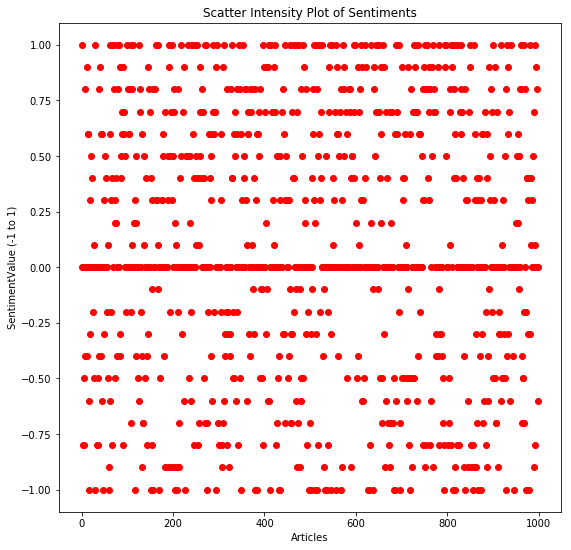

In [57]:
import matplotlib.pyplot as plt
xaxis = []
for i in range(0,1000):
    xaxis.append(i)

ylabel_new_1 = all_sent_values[:1000]

xlabel = xaxis
plt.figure(figsize=(9,9))
plt.xlabel('Articles')
plt.ylabel('SentimentValue (-1 to 1)')
plt.plot(xlabel, ylabel_new_1, 'ro',  alpha=1)

plt.title('Scatter Intensity Plot of Sentiments')
plt.show()